In [1]:
from mofgbmlpy.utility.parallel_cross_validation import run_cross_validation

In [2]:
from mofgbmlpy.utility.parallel_cross_validation import task_moead_homo_triangle_2_3_4_5

for data_name in ["iris", "pima", "bupa"]:
    root_folder = "../.."
    results_root_folder = root_folder + "/results"
    algorithm_id = f"MOEAD{data_name}Basic"
    dataset_root = root_folder + "/dataset"
    
    args = [
        "--data-name", data_name,
        "--rand-seed", "2020",
        "--terminate-evaluation", "10000",
        "--objectives", "num-rules", "error-rate",
        "--algorithm-id", algorithm_id,
        "--root-folder", results_root_folder,
    ]
    
    run_cross_validation(args, dataset_root, task_moead_homo_triangle_2_3_4_5)

Execution time: 62.89097332954407
Execution time: 189.8738033771515
Execution time: 96.07001948356628


=========== DATASET iris ===========



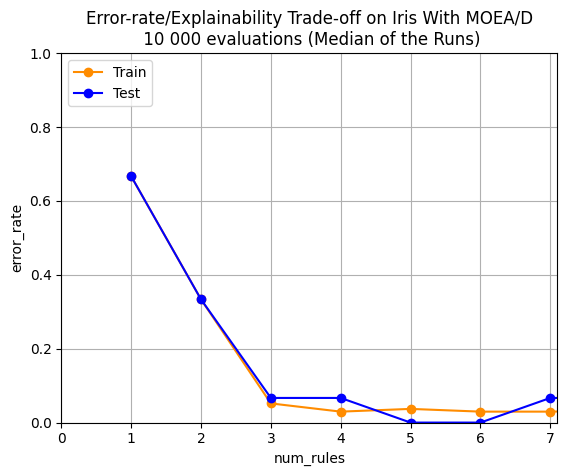

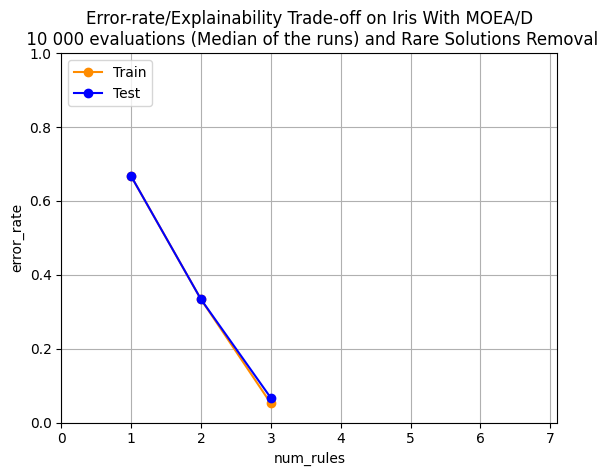

Q1:  17.723622500896454
Median :  18.594210028648376
Q3:  20.94570618867874
Average :  18.75606705347697
Std:  2.3304665077192452
=========== DATASET pima ===========



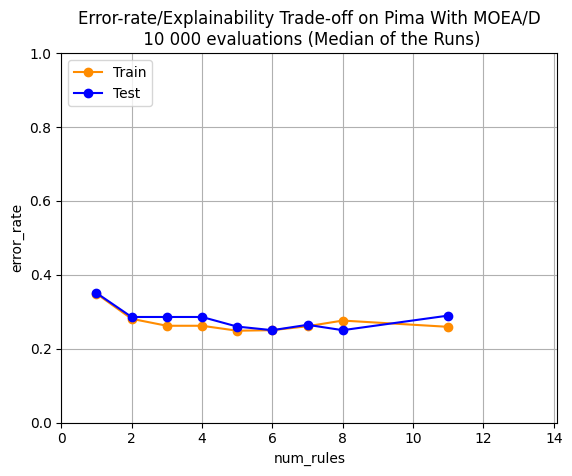

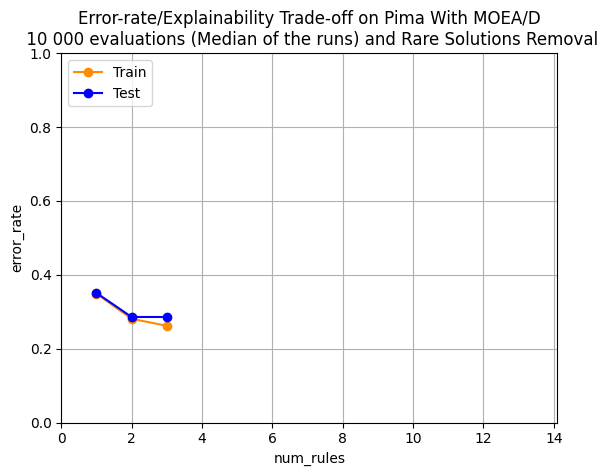

Q1:  52.59120982885361
Median :  56.569092869758606
Q3:  61.84075319766998
Average :  56.12945644855499
Std:  7.512416875822367
=========== DATASET bupa ===========



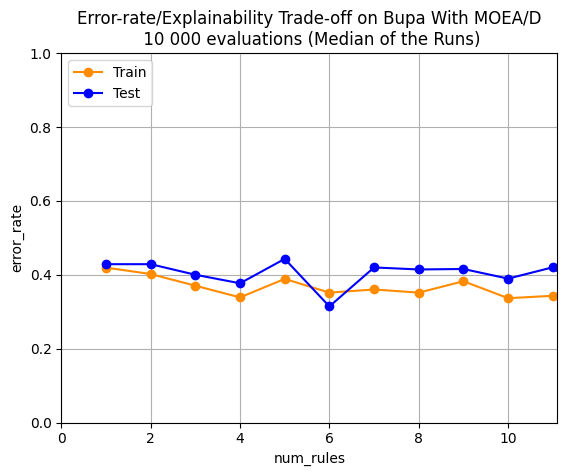

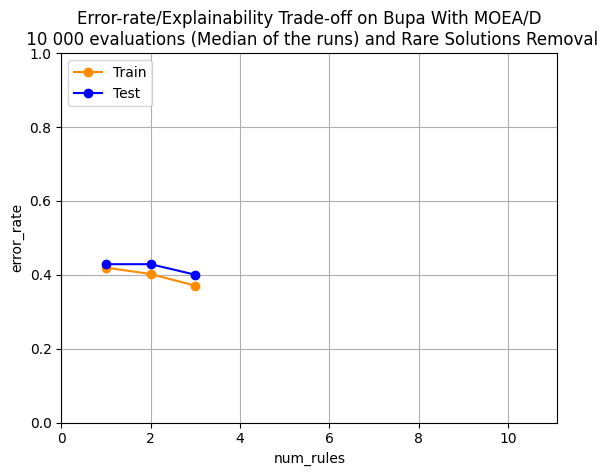

Q1:  26.985659658908844
Median :  28.71811282634735
Q3:  30.19616687297821
Average :  28.466959595680237
Std:  3.704348939855174


In [5]:
from mofgbmlpy.data.output import Output
from mofgbmlpy.utility.parallel_cross_validation import show_results_median_line_plot, get_results, show_results_box_plot
import numpy as np
from matplotlib import pyplot as plt

xlims = {
    "iris": (0,7.1),
    "pima": (0,14.1),
    "bupa": (0,11.1),
}

root_folder = "../.."
results_root_folder = root_folder + "/results"
plot_dir = results_root_folder + "/plots"
Output.mkdirs(plot_dir)

for data_name in ["iris", "pima", "bupa"]:
    print(f"=========== DATASET {data_name} ===========\n")
    algorithm_id = f"MOEAD{data_name}Basic"
    dataset_root = root_folder + "/dataset"
    
    results = get_results(results_root_folder, algorithm_id, data_name)
    results_solutions = [run["solutions"] for run in results]
    run_times = [run["exec_time"] for run in results]
    
    # show_results_box_plot(results_solutions, x_key="num_rules", remove_rare_solutions=True, xlim=None)
    title = f"Error-rate/Explainability Trade-off on {data_name.capitalize()} With MOEA/D\n 10 000 evaluations (Median of the Runs)"
    file_path = f"{plot_dir}/moead_{data_name}_10000eval_median_line"
    show_results_median_line_plot(results_solutions, x_key="num_rules", remove_rare_solutions=False, xlim=xlims[data_name], title=title, file_path=file_path)

    title = f"Error-rate/Explainability Trade-off on {data_name.capitalize()} With MOEA/D\n 10 000 evaluations (Median of the runs) and Rare Solutions Removal"
    file_path = f"{plot_dir}/moead_{data_name}_10000eval_median_line_rare_solutions_removal"
    show_results_median_line_plot(results_solutions, x_key="num_rules", remove_rare_solutions=True, xlim=xlims[data_name], title=title, file_path=file_path)
        
    # plt.boxplot(run_times)
    # plt.title("Execution time")
    # plt.show()
    
    print("Q1: ", np.quantile(run_times, 0.25))
    print("Median : ", np.median(run_times))
    print("Q3: ", np.quantile(run_times, 0.75))
    print("Average : ", np.mean(run_times))
    print("Std: ", np.std(run_times))